In [2]:
import pandas as pd
import numpy as np
import re
import jieba
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']

In [27]:
data = pd.read_csv('job_info_org.csv',encoding='GBK',header=None, index_col=0)

In [28]:
data.index = range(1,len(data)+1)
data.columns = ['岗位名','公司名','工作地点','工资','学历','工作经验','招聘人数','发布日期','公司类型','公司规模','行业','工作描述']
data.shape#(12507, 12)

(12507, 12)

In [29]:
data.drop_duplicates(subset=['岗位名','公司名','学历','工作地点'],keep='first',inplace=True)#去重操作

In [6]:
data.shape#(10609, 12)

(11437, 12)

In [173]:
## 缺失值统计
data.isnull().sum()

岗位名        0
公司名        0
工作地点       0
工资       876
学历       699
工作经验    1846
招聘人数       0
发布日期       0
公司类型       2
公司规模     847
行业         0
工作描述       0
dtype: int64

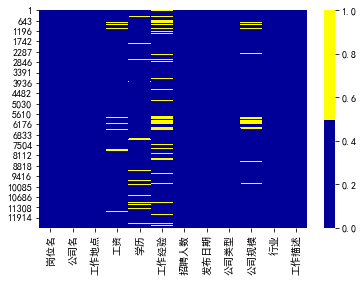

In [11]:
cols = data.columns
colours = ['#000099', '#ffff00']
fig = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
heatmap = fig.get_figure()
heatmap.savefig('2.png', dpi = 300)

<AxesSubplot:>

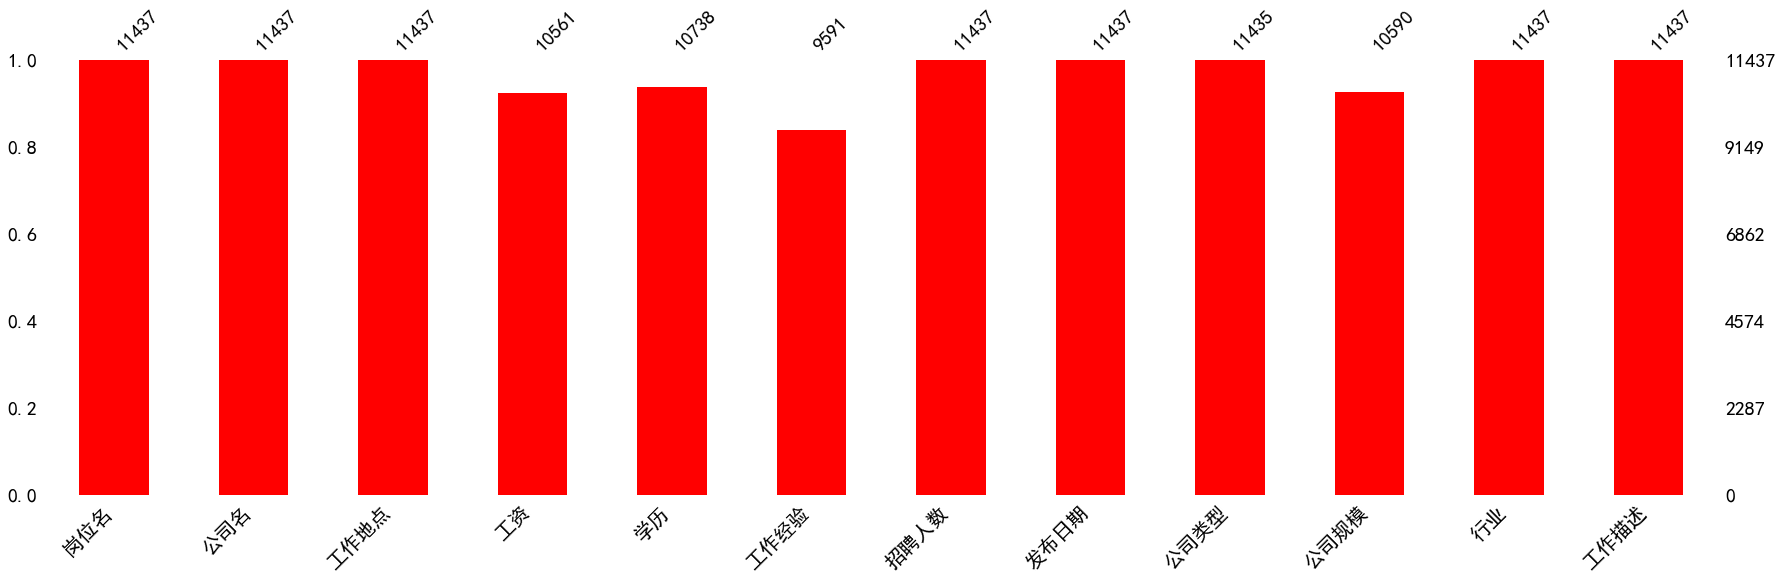

In [175]:
msno.bar(data[cols],figsize=(30,8),color='r',fontsize=20,labels=True)

In [176]:
#缺失数据的百分比列表
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

岗位名 - 0.0%
公司名 - 0.0%
工作地点 - 0.0%
工资 - 8.0%
学历 - 6.0%
工作经验 - 16.0%
招聘人数 - 0.0%
发布日期 - 0.0%
公司类型 - 0.0%
公司规模 - 7.0%
行业 - 0.0%
工作描述 - 0.0%


In [177]:
#1. 岗位名称信息探索
data['岗位名'].str.strip().astype(str).apply(lambda x: x.lower())  #去掉前后空格、转字符串类型、转小写
data['岗位名'].value_counts()

算法工程师                               270
产品经理                                115
销售经理                                111
售前工程师                                68
图像算法工程师                              57
                                   ... 
科研员（咸宁）                               1
运动控制软件高级算法工程师                         1
NLP算法工程师（NLP algorithm engineer）      1
科研员（柳州）                               1
实验技术人员                                1
Name: 岗位名, Length: 7822, dtype: int64

In [178]:
#2. 用规范名称替换岗位名称
job_list = ['数据分析', '数据挖掘', '算法', '大数据',
            '工程师', '运营', '软件工程', '前端开发',
            '深度学习', 'AI', '数据库', '数据库', '数据产品',
            '客服', 'java', '.net', 'andrio', '人工智能', 'c++',
            '数据管理','图像识别','经理','Python工程师','机器学习','推荐系统','云计算','开发','物联网','自然语言处理','架构师','软件']
job_list = np.array(job_list) #为方便通过索引引用
def rename(x=None, name_list=job_list):
    index = [i in x for i in job_list]
    if sum(index)>0:
        return job_list[index][0]
    else:
        x

data['类别'] = data['岗位名'].apply(rename)
data['类别'].value_counts()


工程师       2520
经理        1723
算法        1397
人工智能       379
运营         235
大数据        213
AI         211
架构师        134
客服         107
开发         103
数据分析        88
软件          71
数据挖掘        30
物联网         22
云计算         18
数据产品        17
机器学习        11
java         7
软件工程         6
深度学习         6
前端开发         5
图像识别         3
数据管理         2
自然语言处理       2
c++          2
数据库          2
Name: 类别, dtype: int64

In [180]:
data.dropna(subset=['类别'],inplace=True)
data.shape

(7314, 13)

In [181]:
#3、工作地点处理， 按 - 分割   expand=True  0那一列重新赋值给df['city']

data['工作城市'] = data['工作地点'].str.split('-', expand=True)[0]
data.head(5)

,岗位名,公司名,工作地点,工资,学历,工作经验,招聘人数,发布日期,公司类型,公司规模,行业,工作描述,类别,工作城市
1,软件工程师（频谱感知人工智能方向）,天津先进技术研究院,天津,0.7-1.5万/月,本科,无需经验,招1人,2020/12/29 17:40,事业单位,150-500人,计算机软件,"['1、岗位职责：', '负责电子信号参数测量和基于图像和参数的人工智能处理软件和算法研究工...",工程师,天津
2,人工智能研究员 (MJ000324),深圳市和讯华谷信息技术有限公司,深圳-南山区,3-6万/月,博士,3-4年经验,招1人,2020/12/29 17:30,上市公司,500-1000人,互联网/电子商务,"['岗位职责：', '-基于海量数据，利用机器学习等技术挖掘海量数据，构建和优化设备画像体系...",人工智能,深圳
3,人工智能课程开发工程师,成都瑞德利科技有限公司,成都-高新区,0.8-1万/月,大专,2年经验,招2人,2020/12/29 16:11,民营公司,50-150人,计算机硬件,['1、教学资源开发：根主要负责电子、机械、编程等创客类课程软硬件技术部分的设计、研发等工作...,工程师,成都
4,人工智能产品经理,深圳商周数智科技有限公司,深圳-宝安区,1.5-2.5万/月,本科,5-7年经验,招1人,2020/12/29 15:50,民营公司,少于50人,计算机软件,['1. 负责智慧城市行业如安防、城管、社区等解决方案的研究，能够与客户进行有效的沟通，提炼...,人工智能,深圳
5,人工智能产品经理,泽恩科技有限公司,广州-海珠区,1.2-1.8万/月,本科,5-7年经验,招1人,2020/12/29 15:12,民营公司,50-150人,计算机服务(系统、数据服务、维修),"['【岗位描述】', '负责做出人工智能相关产品规划和项目开发计划，提出产品建议书和项目建议...",人工智能,广州


In [30]:
#4、工资处理
def get_max_min(x=None):
    try:
        if x[-3] == '万':
            a = [float(i)*10000 for i in re.findall('\d+\.?\d*', x)]
        elif x[-3] == '千':
            a = [float(i)*1000 for i in re.findall('\d+\.?\d*', x)]
        if x[-1] == '年':
            a = [i/12 for i in a]
        return a
    except:
        return x
    
salary = data['工资'].apply(get_max_min)
data['最低工资'] = salary.str[0]
data['最高工资'] = salary.str[1]
data['工资水平'] = data[['最低工资','最高工资']].apply('mean')

In [31]:
data["最低工资"] = pd.to_numeric(data["最低工资"],errors='coerce')

In [38]:
data["最高工资"] = pd.to_numeric(data["最高工资"],errors='coerce')

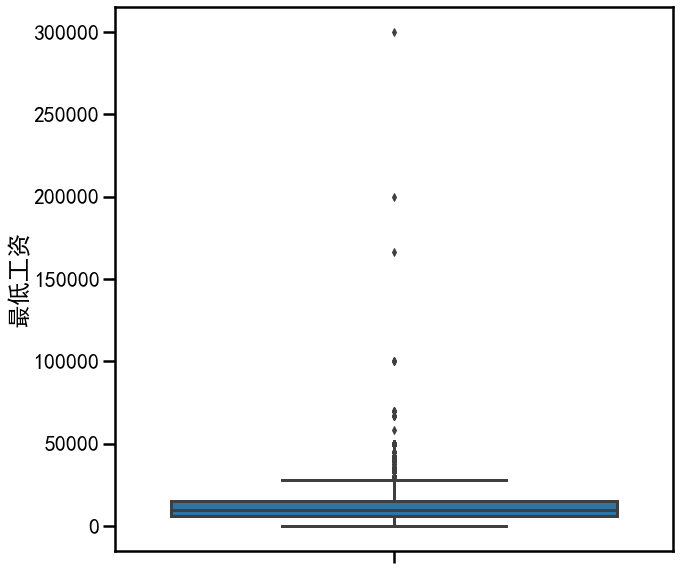

In [40]:
sns.set_context("poster")
plt.figure(figsize=(10,10))
sns.boxplot(y="最低工资",data=data);

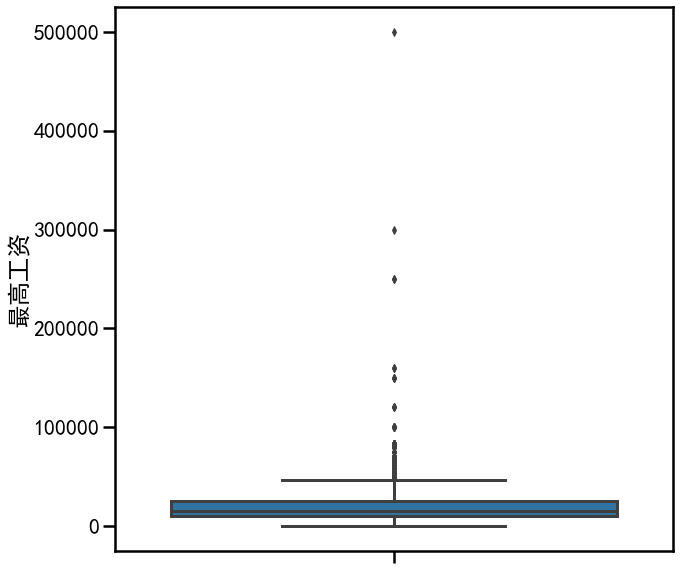

In [41]:
sns.set_context("poster")
plt.figure(figsize=(10,10))
sns.boxplot(y="最高工资",data=data);

In [16]:
#为了准确性，把月薪大于15K的离群点
data = data[data.最低工资 <100000]
data = data[data.最高工资 <100000]

In [188]:
#5、工作描述处理
data['工作描述'].value_counts()

with open('stopwords.txt', 'r',encoding = 'utf-8') as f:
    stopword = f.read()
a = data['工作描述'].str[2:-2].apply(lambda x: x.lower()).apply(lambda x: ''.join(x)).apply(jieba.lcut).apply(lambda x: [i for i in x if i not in stopword])
a[a.apply(lambda x: len(x) < 6)] = np.nan  
data['工作简介'] = a

In [195]:
data['序号'] = [i+1 for i in range(len(data))]

In [198]:
data.columns

Index(['岗位名', '公司名', '工作地点', '工资', '学历', '工作经验', '招聘人数', '发布日期', '公司类型',
       '公司规模', '行业', '工作描述', '类别', '工作城市', '最低工资', '最高工资', '工资水平', '工作简介',
       '序号'],
      dtype='object')

In [199]:
#6、更新新的数据表格


features = ['序号','岗位名','类别', '公司名', '工作地点', '工作城市','最低工资', '最高工资','工资','工资水平', '学历','工作经验', '招聘人数','公司类型','公司规模', '行业', '工作简介','工作描述','发布日期']
data_new = data[features]
data_new.to_csv('job_info_new.csv', encoding='GBK', index=None)
